In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [5]:
class JointNormal1(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([params[0], 0.0], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())
    
    
class JointNormal2(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([0.0, params[0]], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())


def setup_shi(yn,xn):
    # model 1 grad, etc.
    nobs = yn.shape[0]
    model1_param = np.array([yn.mean()])
    model2_param = np.array([xn.mean()])
    
    model1_deriv = JointNormal1(yn,xn)
    ll1 = model1_deriv.loglikeobs(model1_param)
    grad1 =  model1_deriv.score_obs(model1_param).reshape( (nobs,1) )
    hess1 = model1_deriv.hessian(model1_param)
    
    
    model2_deriv = JointNormal2(yn,xn)
    ll2 = model2_deriv.loglikeobs(model2_param)
    grad2 =  model2_deriv.score_obs(model2_param).reshape( (nobs,1) )  
    hess2 = model2_deriv.hessian(model2_param)
    
    return ll1,grad1,hess1,model1_param,ll2,grad2,hess2,model2_param

def gen_data(beta= 1.5, nobs=1000):
    cov = [[25, 0], [0, 1]]
    data = np.random.multivariate_normal([beta,beta], [[25,0],[0,1]],  nobs)
    return data[:,0],data[:,1],nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn)
print(grad1.shape,hess1.shape)

(1000, 1) (1, 1)


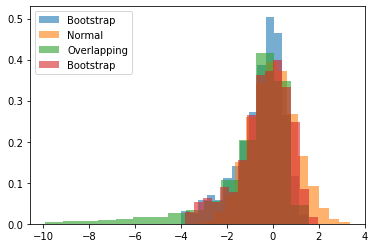

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.546 & 1.094 & -1.140 & 0.866 & -1.137 & 4.433 \\
Bootstrap & -0.365 & 1.245 & -1.144 & 0.624 & -1.140 & 5.247 \\
Normal & -0.006 & 0.988 & 0.033 & -0.079 & 0.033 & 2.845 \\
Overlapping & -1.370 & 19.697 & -1372.095 & 171050.584 & -1371.272 & 171974.196 \\
\bottomrule
\end{tabular}
\end{center}


In [6]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=0)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi)

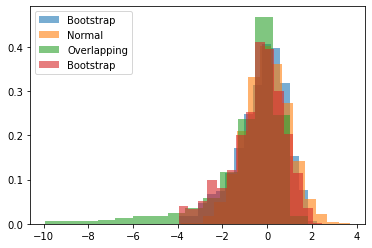

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.259 & 1.218 & -0.986 & 0.522 & -0.983 & 4.950 \\
Bootstrap & -0.400 & 1.411 & -1.172 & 0.509 & -1.169 & 6.451 \\
Normal & -0.009 & 0.992 & -0.028 & 0.014 & -0.028 & 2.961 \\
Overlapping & -1.473 & 19.864 & -894.456 & 67285.637 & -893.920 & 68374.223 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=.5)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi)

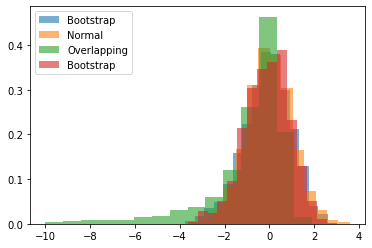

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.108 & 1.130 & -0.449 & 0.170 & -0.448 & 3.985 \\
Bootstrap & -0.093 & 1.064 & -0.385 & 0.211 & -0.384 & 3.593 \\
Normal & 0.011 & 0.999 & 0.035 & 0.167 & 0.035 & 3.157 \\
Overlapping & -1.435 & 16.798 & -680.189 & 55249.675 & -679.781 & 56018.236 \\
\bottomrule
\end{tabular}
\end{center}


In [8]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=1.5)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi)